In [1]:
import os
import pandas as pd
from binance.client import Client
from binance import ThreadedWebsocketManager
from datetime import datetime, timedelta

In [2]:
API_KEY = os.getenv('BINANCE_API')
API_SECRET = os.getenv('BINANCE_SECRET')

In [3]:
client = Client(api_key = API_KEY, api_secret = API_SECRET, tld = "us")

In [4]:
client.ping()

{}

In [5]:
client.get_server_time()

{'serverTime': 1672672386512}

In [6]:
account = client.get_account()
account["accountType"]  #Account Type

'SPOT'

e: Event Type
E: Event Time
s: Symbol
c: Close Price
o: Open Price
h: High Price
l: Low Price
v: Total Traded Base Asset Volume
q: Total Traded Quote Asset Volume

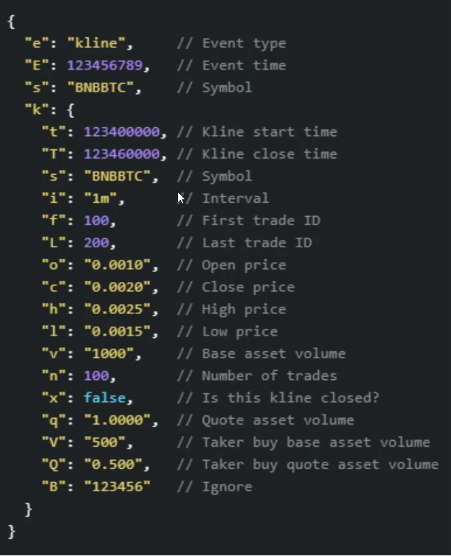

In [7]:
def stream_data(msg):
    '''define how to process incoming websocket messages'''
    time = pd.to_datetime(msg["E"], unit="ms")
    price = msg["c"]
    print("Time: {} | Price: {}".format(time, price))

In [8]:
#initialize and start the websocket
twm = ThreadedWebsocketManager(tld = "us")
twm.start()

In [9]:
#subscribe to a specific stream
twm.start_symbol_miniticker_socket(callback = stream_data, symbol = "BTCUSDT")

'btcusdt@miniTicker'

Time: 2023-01-02 15:15:23.395000 | Price: 16710.86000000
Time: 2023-01-02 15:15:24.242000 | Price: 16711.76000000
Time: 2023-01-02 15:15:25.707000 | Price: 16712.25000000
Time: 2023-01-02 15:15:37.536000 | Price: 16717.28000000
Time: 2023-01-02 15:15:40.164000 | Price: 16713.88000000
Time: 2023-01-02 15:15:49.387000 | Price: 16717.96000000
Time: 2023-01-02 15:15:50.321000 | Price: 16715.14000000
Time: 2023-01-02 15:15:51.209000 | Price: 16717.35000000
Time: 2023-01-02 15:15:51.666000 | Price: 16717.38000000


In [10]:
twm.stop() #stop the websocket/stream

CANCEL read_loop
